<div class="alert alert-block alert-warning"><p><h1><center>Data Pyrates (Team 1)</center></h1> </p></div>




<font color=orange>**Python Hackathon April 2023**</center></font>

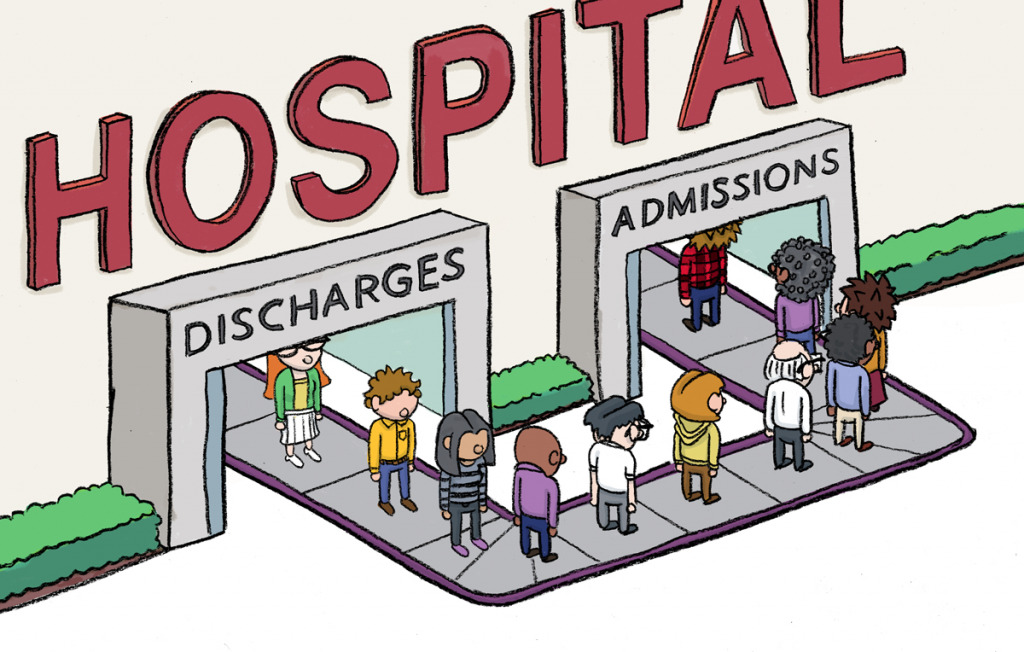

**Table of Content**
- [x] Introduction to workspace
- [x] Data and Methods
- [x] Expolratory Data Analysis (EDA) and overview
- [x] Hackathon Problem Statements (1-80)




# Introduction to dataset

Information about the used variables

- "PatientID" - Patients idenfication 
- "Visit Type"- type of appointments scheduled to the hospital eg:, Physical, Follow Up, Telemedicine, 
- "ED Dispostion" - Disposition (admission or discharge) is, of course, the ultimate endpoint for all emergency department visits
- "Discharge Disposiiton" - The disposition of the patient at time of discharge (i.e., discharged to home, expired, and transfer)
- "Primary Diagnosis" - Primary Diagnosis means the main condition treated or investigated during the relevant episode of -healthcare.
- "Expected LOS" - Expected length of stay in hospital
- "Expected Mortality" - predicted number of deaths in the hospital 
- "ReAdmission Flag" - Value is 1 for patients at high risk of readmission 
- "Service" - Different levels of hopsital units like ICU, Orthopeadics, General Medicine, Neurology, Primary Care
- "Provider Speciality" - Department to which providers/doctors belong to.


## Data and Methods

In [1]:
# pip install panda
# pip install matplotlib
# pip install numpy
# pip install seaborn
# pip install colorama

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("HospitalDatabase.xlsx")
df_PA = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Patients")
df_ED = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "EDVisits")
df_AmbV = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "AmbulatoryVisits")
df_ReAd = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "ReAdmissionRegistry")
df_Dis = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Discharges")
df_Pro = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Providers")
df_EDU = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "EDUnique")


**Methods**
1. Data Validation: Checked the data type, format, duplicate or redundant data, null or missing values 
2. Data Visualization: Employed Matplotlib and Seaborn to create various plots, including barplots, lineplots, and heat maps, to identify patterns and relationships. 

In [4]:
df_PA.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   PatientID    945 non-null    float64       
 1   FirstName    945 non-null    object        
 2   LastName     945 non-null    object        
 3   DateOfBirth  945 non-null    datetime64[ns]
 4   Gender       945 non-null    object        
 5   Race         945 non-null    object        
 6   Language     937 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 51.8+ KB


In [5]:
df.describe()

,PatientID
count,945.000000
mean,473.000000
std,272.942302
min,1.000000
25%,237.000000
50%,473.000000
75%,709.000000
max,945.000000


**Checking for unwanted or special charaters entries-,?,#,*,etc.**

In [17]:

for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

PatientID : [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.
  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.
  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.
  86.  87.  88.  89.  90.  46.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.

# Null Values 

In [7]:
df.isnull().sum() 

PatientID      0
FirstName      0
LastName       0
DateOfBirth    0
Gender         0
Race           0
Language       8
dtype: int64

In [8]:
df_ReAd.isnull().sum()

AdmissionID                    0
PatientID                      0
AdmissionDate                  0
DischargeDate                  0
DischargeDisposition           0
Service                        0
PrimaryDiagnosis               0
ExpectedLOS                    0
ExpectedMortality              0
ReadmissionFlag              526
DaysToReadmission            526
EDVisitAfterDischargeFlag    379
dtype: int64

**There are 8 null values in Patient Table's language column. In the ReAdmission Registry, there are 526 null values in Readmission Flag and DaysToReadmission  each, and 379 in EDVisitAfterDischargeFlag.**